<b>Machine Learning using Python
<br>Exam – Paper 1</b>

Name : Kailas Muke
<br>Batch : PGA WE01

<b>Part I: Supervised Learning</b>
<br><br>Import Required Libraries to perform ML

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.metrics import roc_curve
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.shape

(41188, 21)

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<h4>Find out the Numeric from the Dataset</h4>

In [6]:
print('Columns with Numeric Data Type : ',bank[bank.select_dtypes(include = ['int', 'float']).columns].shape[1],'\n\n',bank.columns[bank.dtypes != 'object'])
# bank[bank.select_dtypes(include=['int', 'float']).columns]



Columns with Numeric Data Type :  5 

 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


<h4>Find out Object type Columns from the Dataset</h4>

In [7]:
print('\n\n\nColumns with Obejct Data Type : ',bank[bank.select_dtypes(include = ['object']).columns].shape[1],'\n\n', bank.columns[bank.dtypes == 'object'])
# bank[bank.select_dtypes(include = ['object']).columns]




Columns with Obejct Data Type :  11 

 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


<h4>Find out Categorical Columns from the Object Datatype Features of the Dataset</h4>

In [8]:
categorical_cols = []
non_categorical_cols = []
bank_obj_cols = bank.select_dtypes(include = ['object']).columns

for i in range(bank[bank.select_dtypes(include = ['object']).columns].shape[1]):
    if(len(bank[bank_obj_cols[i]].value_counts()) <= 8 ):
        categorical_cols.append(bank_obj_cols[i])
    else:
        non_categorical_cols.append(bank_obj_cols[i])
        
print("Categorical Columns with 8 or less than 8 unique values are : \n", categorical_cols)
print("\n \n Non Categorical Columns with more than 8 unique values are : \n", non_categorical_cols)

Categorical Columns with 8 or less than 8 unique values are : 
 ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome', 'y']

 
 Non Categorical Columns with more than 8 unique values are : 
 ['job', 'month']


<h2>Conclusion : </h2>   
<h4> We have discovered that there are 11 object types features and 10 non-object data type</h4>
<h4> There are a total of 9 Features which have Categorical Data in the Dataset </h4>

<h3>2. Perform the following Exploratory Data Analysis</h3>

<h5> a. Missing Value Analysis</h5>

In [9]:
bank.columns[bank.isnull().sum() > 0]

Index([], dtype='object')

<h5> b. Label Encoding wherever required </h5>

In [10]:
le = LabelEncoder()

bank[bank.select_dtypes(include = ['object']).columns] = bank[bank.select_dtypes(include = ['object']).columns].apply(le.fit_transform)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<h5> c. Divide the Dataset into train and test sets </h5>

In [11]:
#from sklearn.model_selection import train_test_split

bank_x = bank.iloc[:,0:-1]
bank_y = bank.iloc[:,-1]

bank_train_x, bank_test_x, bank_train_y,  bank_test_y = train_test_split(bank_x, bank_y, test_size=.2)


<h5> d. Selecting important features based on Random Forest </h5>

In [19]:
rfe = RandomForestClassifier()
rfe = RFE(rfe)

rfe.fit(bank_train_x, bank_train_y)

rfe.support_

array([ True,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True])

In [20]:
rfe_feature_selection = pd.DataFrame({'Var':bank_x.columns, 'Imp':rfe.support_})
rfe_feature_selection.sort_values('Imp', ascending = False )

,Var,Imp
0,age,True
9,day_of_week,True
18,euribor3m,True
17,cons.conf.idx,True
12,pdays,True
11,campaign,True
1,job,True
10,duration,True
3,education,True
19,nr.employed,True


<h5> e. Handling unbalanced data using SMOTE </h5>

In [43]:
!pip3 install -U imbalanced-learn

In [21]:
from imblearn.over_sampling import SMOTE

# counter = Counter(bank_train_y)
print('Before \n', bank_train_y.value_counts())

smt = SMOTE()

bank_train_x_sm, bank_train_y_sm = smt.fit_resample(bank_train_x, bank_train_y)

print('====================\nAfter \n', bank_train_y_sm.value_counts())

Before 
 0    29255
1     3695
Name: y, dtype: int64
After 
 0    29255
1    29255
Name: y, dtype: int64


<h5> f. Standardize the data using the anyone of the scalers provided by sklearn </h5>

In [22]:
from sklearn.preprocessing import StandardScaler, normalize

scalar = StandardScaler()
bank_sns1 = scalar.fit_transform(bank)

<h3>Q3. Build the following Supervised Learning models:</h3>

In [23]:
model_name_lst = []

AccuracyScore = []
PrecisionScore = []
Recall_Score = []
F1_score = []
Roc_Scr = []


def model_scores(model_name, model_obj):
    
    pred_y = model_obj.predict(bank_test_x)
    
#     print(pred_y)
    
#     ConfusionMatrix = confusion_matrix(pr_test_y, pr_pred_y) 
#     print('ConfusionMatrix')
#     print(ConfusionMatrix,'\n')

    AccuracyScore.append(np.round((model_obj.score(bank_test_x, bank_test_y))*100))

    PrecisionScore.append(((precision_score(bank_test_y, pred_y))*100).round(2))

    Recall_Score.append(((recall_score(bank_test_y, pred_y))*100).round(2))

    F1_score.append(((f1_score(bank_test_y, pred_y))*100).round(2))

    Roc_Scr.append(((roc_auc_score(bank_test_y, pred_y))*100).round(2))

    model_name_lst.append(model_name)


<h3>Logistic Regression classification</h3>

In [24]:
logreg = LogisticRegression(max_iter  =500)
logreg.fit(bank_train_x_sm, bank_train_y_sm)

# pred_y = logreg.predict(bank_test_x)

model_scores('Logistic Reg', logreg)

D:\Installation\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3>Ada Boost Classifier</h3>

In [25]:
ada = AdaBoostClassifier()
ada.fit(bank_train_x_sm, bank_train_y_sm)
model_scores('Ada Boost', ada)

<h3>Naive Bayes</h3>

In [26]:
nb = GaussianNB()
nb.fit(bank_train_x_sm, bank_train_y_sm)
model_scores('Naive Bayes', nb)

<h3>KNN</h3>

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(bank_train_x_sm, bank_train_y_sm)
model_scores('KNN', knn)

<h3>Support Vector Machine</h3>

In [28]:
svm = SVC()
svm.fit(bank_train_x_sm, bank_train_y_sm)
model_scores('SVM', svm)

<h3>Q4] Tabulate the performance metrics of all the above models
and tell which model performs better in predicting if the
client will subscribe to term deposit or not </h3>

<h3>Performance Metrics of all the above models </h3>

In [29]:
Scores = pd.DataFrame({'Accuracy Score' : AccuracyScore, 'Precision Score': PrecisionScore, 'Recall Score': Recall_Score, 'F1 score': F1_score, 'Roc Scr':Roc_Scr}, index= [model_name_lst])
df = Scores.sort_values('Precision Score', ascending=False)
df

,Accuracy Score,Precision Score,Recall Score,F1 score,Roc Scr
Ada Boost,89.0,49.92,70.05,58.30,80.47
KNN,86.0,42.72,77.04,54.96,81.83
Logistic Reg,85.0,42.60,80.42,55.70,83.19
SVM,84.0,40.99,85.93,55.50,84.95
Naive Bayes,78.0,29.83,68.47,41.55,73.80


<h2>Part II</h2>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [31]:
tm = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')
tm.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [32]:
tm.shape

(10227, 10)

<h4>Q1. Get the modal price of onion for each month for the Mumbai
market (Hint: set monthly date as index and drop
redundant columns)<h4>

In [33]:
de = pd.DataFrame(tm.groupby('month').priceMod.mean().round(2))
de.sort_index()

,priceMod
month,
April,576.16
August,1288.90
December,1119.03
February,821.59
January,986.30
July,926.93
June,729.13
March,642.42
May,576.93


In [34]:
# Group the Data according to each month of the year in a sorted manner
date = pd.DataFrame(tm.groupby('date').priceMod.mean().round(2))
date.sort_index()

# Reset the index as an individual coulumn for converting into an integer format
date.reset_index(level=0, inplace = True)

In [35]:
# Process the date column as per requirement in a different DF and add to the original DF

date2 = date['date'].str.split('-', expand = True)
date2.rename(columns = {0: 'month', 1:'year'}, inplace=True)
date2['month'] = date2['month'].replace({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 
                             'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
date2['full_Date'] = date2['year'].astype(str)+'-'+date2['month'].astype(str)
date2.head()


,month,year,full_Date
0,4,1996,1996-4
1,4,1997,1997-4
2,4,1998,1998-4
3,4,1999,1999-4
4,4,2000,2000-4


In [36]:
# Add the processed Date column to the original Dataframe

date['Date'] = date2['full_Date']
date.drop(['date'], inplace= True, axis = 1)

date.Date = pd.to_datetime(date.Date, infer_datetime_format=True)
date_index = date.set_index(['Date'])

In [37]:
date_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 1996-04-01 to 2015-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   priceMod  242 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [38]:
date_index = date_index.sort_index()

<h4>Q2. Build time series model and check the performance of the model using RMSE</h4>

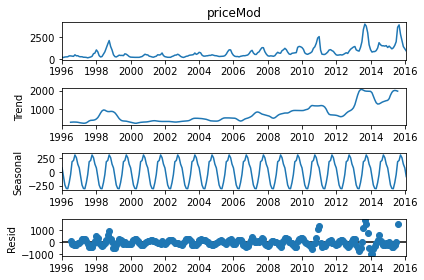

In [39]:
date_index_log = np.log(date_index)
# result =  seasonal_decompose( tm_index_log.priceMod, period=10)
result =  seasonal_decompose( date_index.priceMod , period=12)
result.plot();

In [40]:
date_index_log.shape

(242, 1)

In [41]:
# Build Model using SARIMAX

train = date_index_log[0:229]
test = date_index_log[229:]

model_sarima = SARIMAX(train, order=(10, 0, 0), seasonal_order=(0, 2, 0, 12))

D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [42]:
results = model_sarima.fit()

In [43]:
results.predict()    #<- it prredicted for all the data we trained it on

1996-01-01    0.000000
1996-02-01    0.000003
1996-03-01    0.000006
1996-04-01    0.000007
1996-05-01    0.000008
                ...   
2014-09-01    7.577690
2014-10-01    7.104435
2014-11-01    7.565445
2014-12-01    7.043957
2015-01-01    7.205599
Freq: MS, Name: predicted_mean, Length: 229, dtype: float64

In [44]:
pred_result = results.predict(start = 231, end =242)

# pred_result = results.forecast(steps = 12)

pred_result_actual_scale = pd.DataFrame(np.exp(pred_result).round(2))

date_for_pred = ['2015-03-01', '2015-04-01','2015-05-01', '2015-06-01','2015-07-01','2015-08-01','2015-09-01',
'2015-10-01','2015-11-01','2015-12-01','2016-01-01','2016-02-01']

# pred_result_actual_scale = pd.concat([pred_result_actual_scale, pd.Series(date_for_pred)], axis = 1 )

pred_result_actual_scale['Date'] =  date_for_pred

pred_result_actual_scale.rename(columns={pred_result_actual_scale.columns[0]:'Predicted'}, inplace = True)

pred_result_actual_scale.rename(columns={pred_result_actual_scale.columns[1] : 'Date'}, inplace = True)

pred_result_actual_scale.Date = pd.to_datetime(pred_result_actual_scale.Date, infer_datetime_format=True)

pred_result_actual_scale = pred_result_actual_scale.set_index(['Date'])

In [55]:
error = test['priceMod'] - pred_result_actual_scale['Predicted']
error


Date
2015-02-01            NaN
2015-03-01   -1343.220832
2015-04-01   -1394.957269
2015-05-01   -1682.290016
2015-06-01   -3919.613886
2015-07-01   -2936.708229
2015-08-01   -3377.643616
2015-09-01   -3558.091219
2015-10-01   -2853.218867
2015-11-01   -2894.409803
2015-12-01   -1884.586306
2016-01-01   -1073.201271
2016-02-01   -1584.568748
dtype: float64

In [56]:
import math


MSE = np.mean(np.square(error))
RMSE = math.sqrt(MSE)
mape = np.mean(np.abs(error *100 /pred_result_actual_scale['Predicted']))

print("Mean Square Error :", round(MSE,2))
print("Root Mean Square Error :", round(RMSE, 2))
print("Mean Absolute Percentage Error :", round(mape, 2))

Mean Square Error : 6530759.67
Root Mean Square Error : 2555.54
Mean Absolute Percentage Error : 99.63


<AxesSubplot:xlabel='Date'>

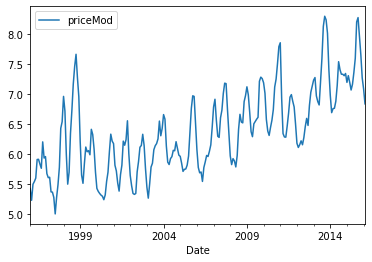

In [57]:
date_index_log.plot()

<h4>Q3. Plot ACF and PACF plots</h4>

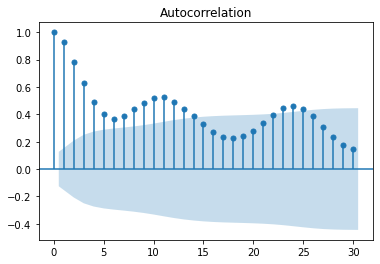

In [58]:
# ACF Plots

plot_acf(date_index_log.priceMod, lags = 30);

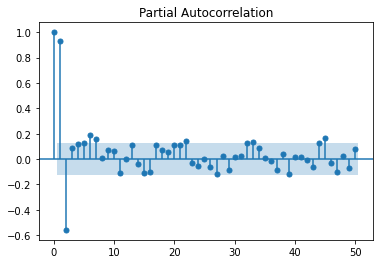

In [59]:
# PACF Plots

plot_pacf(date_index_log.priceMod, lags = 50);

<h4>Q4. Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market</h4>

Forecasting the Onion Prices for the next 12 months and validating it against the test set

In [60]:
train_unlog = np.exp(train).round(2)
test_unlog = np.exp(test).round(2)

<AxesSubplot:xlabel='Date'>

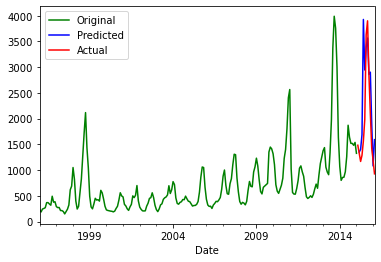

In [61]:
train_unlog['priceMod'].plot(legend = True, label = 'Original', color='green') # train target data in green
pred_result_actual_scale['Predicted'].plot(legend = True, label = 'Predicted', color='blue') # Predicted target data in blue
test_unlog['priceMod'].plot(legend = True, label = 'Actual', color='red') # test target data in red

In [62]:
error = test_unlog['priceMod'] - pred_result_actual_scale['Predicted']
error

Date
2015-02-01        NaN
2015-03-01     -25.41
2015-04-01    -234.39
2015-05-01    -402.56
2015-06-01   -2361.23
2015-07-01    -962.48
2015-08-01     241.97
2015-09-01     333.83
2015-10-01     -22.38
2015-11-01    -801.00
2015-12-01    -464.33
2016-01-01     106.18
2016-02-01    -665.05
dtype: float64